In [8]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

ps = fits.open('../plane_ps1_g10-20_10_12_18.fits')[1].data
pickles = Table.read('../picklemags_laphare_final.txt', format='ascii')
q = np.where((ps['expsum'] > 3) & (ps['ctsum'] > 0) & (ps['bkgdsum'] > 0) & (ps['angsep']*3600. < 2.))
ps = ps[q]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


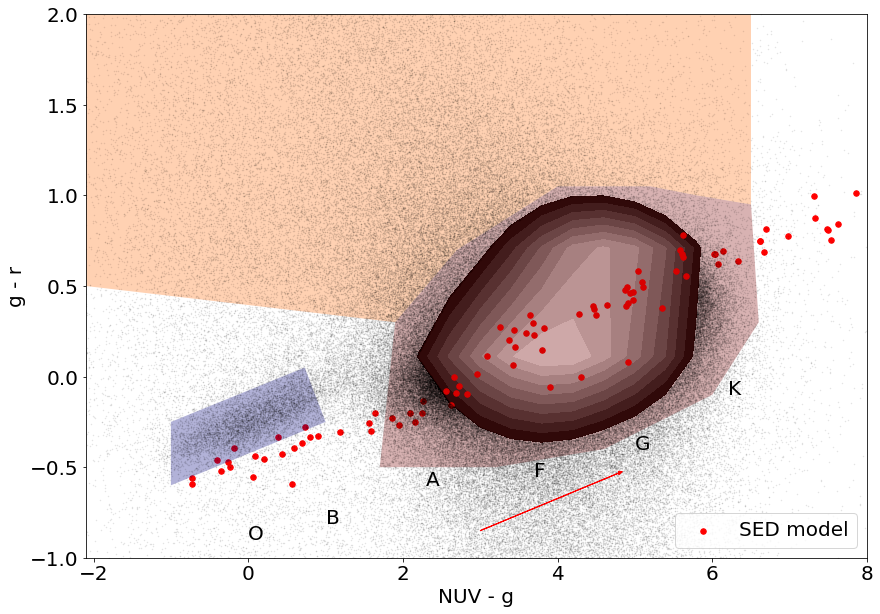

In [73]:
fig, ax = plt.subplots(figsize=(14, 10))
scatter_contour(ps['nuv']-ps['g_ps'], ps['g_ps']-ps['r_ps'], threshold=10000, log_counts=True, histogram2d_args=dict(bins=40), plot_args=dict(color='k', markersize=1, alpha=0.1), contour_args=dict(cmap=cm.gray))
plt.scatter(pickles['nuv']-pickles['g'], pickles['g']-pickles['r'], color='red', label='SED model',  s=30)
plt.xlim((-2.1, 8))
plt.ylim((-1, 2))

plt.annotate('O', xy=(0, -0.9), size=20)
plt.annotate('B', xy=(1, -0.81), size=20)
plt.annotate('A', xy=(2.3, -0.6), size=20)
plt.annotate('F', xy=(3.7, -0.55), size=20)
plt.annotate('G', xy=(5, -0.4), size=20)
plt.annotate('K', xy=(6.2, -0.1), size=20)
plt.xlabel('NUV - g')
plt.ylabel('g - r')
plt.arrow(3,  -0.85,  2.972-1.1838,  1.1838-0.8664,  head_length=0.05,  head_width=0.02,  color='red')
plt.legend(scatterpoints=1, loc=4)

p1 = Polygon([[1.7, -0.5], [1.9, 0.3], [2.7, 0.7], [4, 1.05], [5.2, 1.05], [5.8, 1], [6.5, 0.95], [6.6, 0.3], [6, -0.1], [4.6, -0.4], [3.2, -0.5], [1.7, -0.5]])
p2 = Polygon([[-1, -0.6], [1, -0.25], [0.73, 0.05], [-1, -0.25], [-1, -0.6]])
p3 = Polygon([[1.7, -0.5], [1.9, 0.3], [2.7, 0.7], [4, 1.05], [5.2, 1.05], [5.8, 1], [6.5, 0.95], [6.5, 2], [-2.1, 2], [-2.1, 0.5], [1.9, 0.3]])

patches = [p1, p2, p3]
p = PatchCollection(patches, alpha=0.3, cmap=matplotlib.cm.jet)
p.set_array(np.array([100, 0, 80]))
#p.set_array(np.array(100.*np.random.rand(3)))
ax.add_collection(p)
plt.show()